In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from modules.missing import plot_missing_percentage as pmp
import warnings
warnings.filterwarnings('ignore')

## Bureau Balance

In [2]:
bb = pd.read_csv('.././data/bureau_balance.csv')

In [3]:
display(bb.sample(8))
print(f'Bureau Balance data contains:\n{bb.shape[0]} rows and {bb.shape[1]} columns')
print(f'\n\Bureau Balance data information:\n')
print(bb.info())

SK_ID_BUREAU  MONTHS_BALANCE STATUS
12127178       6082265              -8      C
26738676       5962953             -46      C
17222219       5297860             -25      C
5856900        6423609             -12      C
25086431       6332554             -25      C
25089932       6333432             -31      0
19942201       6190331             -28      C
27006231       6692128             -43      C

Bureau Balance data contains:
27299925 rows and 3 columns

\Bureau Balance data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27299925 entries, 0 to 27299924
Data columns (total 3 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   SK_ID_BUREAU    int64 
 1   MONTHS_BALANCE  int64 
 2   STATUS          object
dtypes: int64(2), object(1)
memory usage: 624.8+ MB
None


## Credit card balance Missing and Duplicate values checking 

In [4]:
print(f'\nMissing values:{bb.isna().sum().sum()}')
print(f'\nDuplicated values:{bb.duplicated().sum()}')


Missing values:0

Duplicated values:0


no missing and duplicate values

## Bureau

In [5]:
bureau = pd.read_csv('.././data/bureau.csv')

In [7]:
display(bureau.sample(8))
print(f'Bureau data contains:\n{bureau.shape[0]} rows and {bureau.shape[1]} columns')
print(f'\nBureau data information:\n')
print(bureau.info())

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
656174       438627       6789751        Closed      currency 1         -451   
1426196      307102       6740292        Active      currency 1         -700   
1186484      199996       5529185        Active      currency 1         -243   
196116       357349       6262261        Closed      currency 1        -2541   
1022928      193028       5924773        Active      currency 1        -2166   
1389595      188629       6605942        Closed      currency 1        -1140   
593867       349581       6778686        Closed      currency 1        -1250   
1118576      223669       6483175        Closed      currency 1         -200   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  DAYS_ENDDATE_FACT  \
656174                    0                  NaN             -444.0   
1426196                   0                  NaN                NaN   
1186484                   0                857.0                NaN   
196116                    0              -2206.0            -2150.0   
1022928                   0              -1792.0                NaN   
1389595                   0                686.0             -571.0   
593867                    0              -1066.0            -1065.0   
1118576                   0               -193.0             -196.0   

         AMT_CREDIT_MAX_OVERDUE  CNT_CREDIT_PROLONG  AMT_CREDIT_SUM  \
656174                      NaN                   0         9000.00   
1426196                     NaN                   0      1125000.00   
1186484                     NaN                   0       810000.00   
196116                      NaN                   0        40637.79   
1022928                     NaN                   0        90000.00   
1389595                     NaN                   0       891000.00   
593867                      NaN                   0        46867.50   
1118576                     NaN                   0         4500.00   

         AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_LIMIT  AMT_CREDIT_SUM_OVERDUE  \
656174                   0.0                   NaN                     0.0   
1426196                  NaN                   NaN                     0.0   
1186484                  0.0                   0.0                     0.0   
196116                   0.0                   NaN                     0.0   
1022928                  NaN                   NaN                     0.0   
1389595                  0.0                   0.0                     0.0   
593867                   0.0                   0.0                     0.0   
1118576                  0.0                   NaN                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  AMT_ANNUITY  
656174         Microloan                -444          NaN  
1426196  Consumer credit                 -32          NaN  
1186484      Credit card                 -10          NaN  
196116   Consumer credit                -863          NaN  
1022928  Consumer credit               -1793      10656.0  
1389595  Consumer credit                -252       7110.0  
593867   Consumer credit               -1064          NaN  
1118576  Consumer credit                -194          NaN

Bureau data contains:
1716428 rows and 17 columns

Bureau data information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1716428 entries, 0 to 1716427
Data columns (total 17 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   SK_ID_CURR              int64  
 1   SK_ID_BUREAU            int64  
 2   CREDIT_ACTIVE           object 
 3   CREDIT_CURRENCY         object 
 4   DAYS_CREDIT             int64  
 5   CREDIT_DAY_OVERDUE      int64  
 6   DAYS_CREDIT_ENDDATE     float64
 7   DAYS_ENDDATE_FACT       float64
 8   AMT_CREDIT_MAX_OVERDUE  float64
 9   CNT_CREDIT_PROLONG      int64  
 10  AMT_CREDIT_SUM          float64
 11  AMT_CREDIT_SUM_DEBT     float64
 12  AMT_CREDIT_SUM_LIMIT    float64
 13  AMT_CREDIT_SUM_OVERDUE  float64
 14  CREDIT_TYPE             object 
 15  DAYS_CREDIT_UPDATE      int64  
 16  AMT_ANNUITY             float64
dtypes: float64(8), int64(6), object(3)
memory usage: 222.6+ MB
None


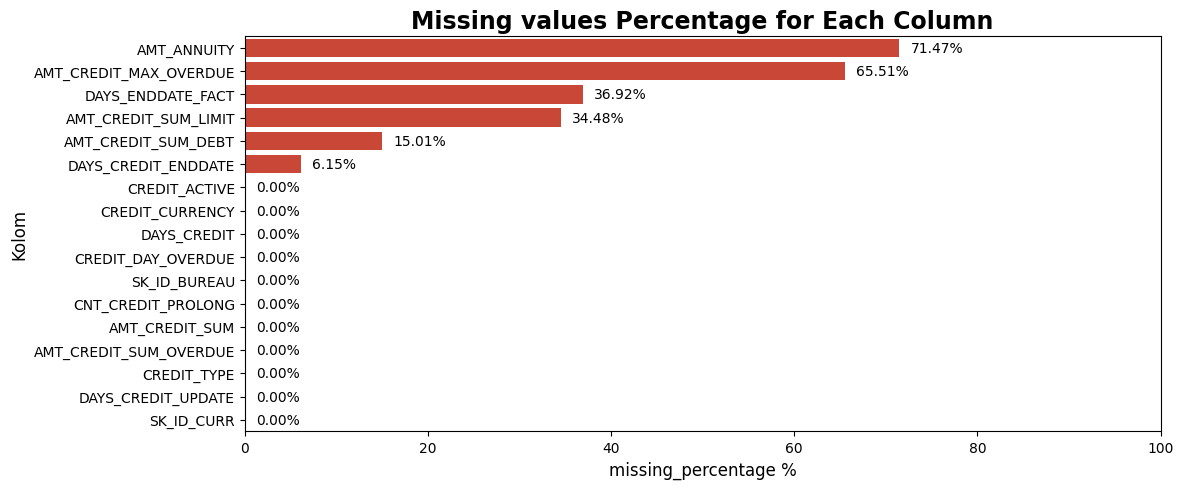

In [10]:
pmp(bureau)

In [12]:
# function to drop columns with missing values
def dropna(df, threshold):
    '''
    Drop columns from a DataFrame where the proprortion of missing values is greater than specified threshold.

    Parameters:
    df: The DataFrame to process
    threshold: The threshold proportion of missing vales. Columns with a proportion of missing values greater than this will be dropped.

    Returns:
    Pandas.DataFrame: The processed DataFrame. 
    '''
    for column in df.columns:
        missing_proportion = df[column].isnull().sum() / len(df)
        if missing_proportion > threshold:
            df = df.drop(column, axis=1)
    return df

In [13]:
# drop columns with too much missing values percentage
bureaucl = dropna(bureau)

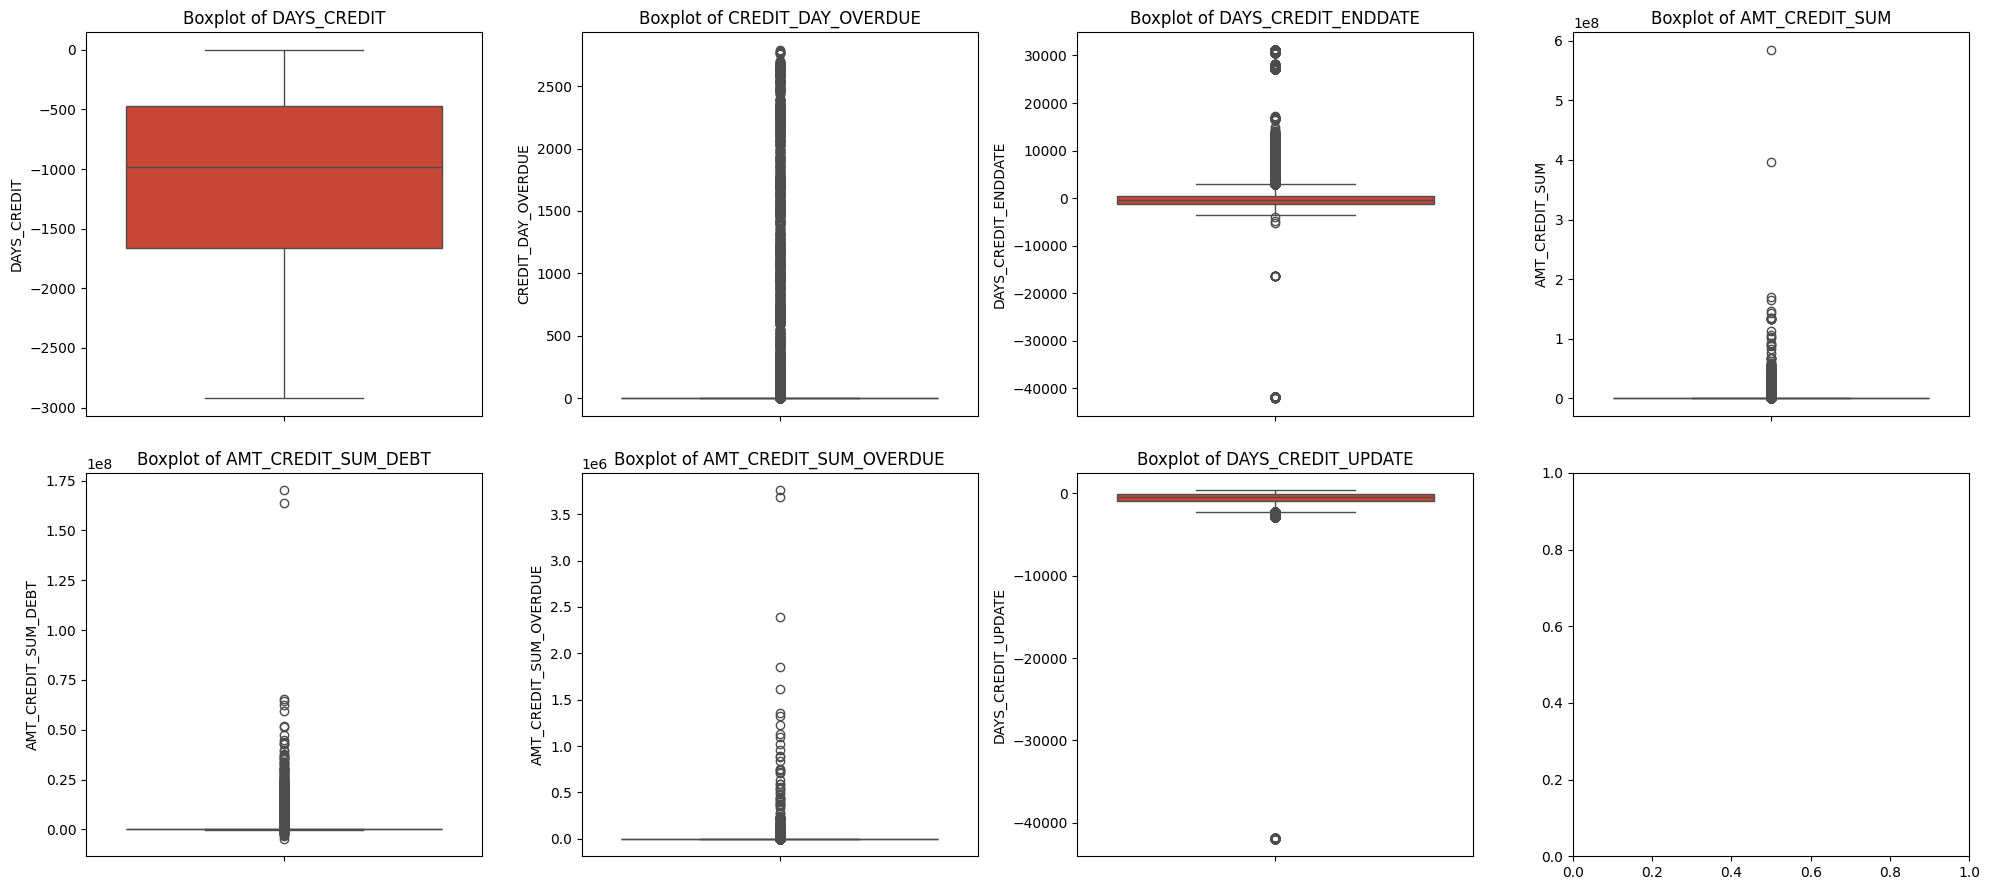

In [14]:
numbur = bureaucl.select_dtypes(include='number').drop(['SK_ID_CURR', 'SK_ID_BUREAU', 'CNT_CREDIT_PROLONG'], axis=1)

# Create boxplot for every numerical column
fig, ax = plt.subplots(2, 4, figsize=(20, 9))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.boxplot(y=numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Boxplot of {col}')
plt.tight_layout()

some of features from bureau dataset contains outliers

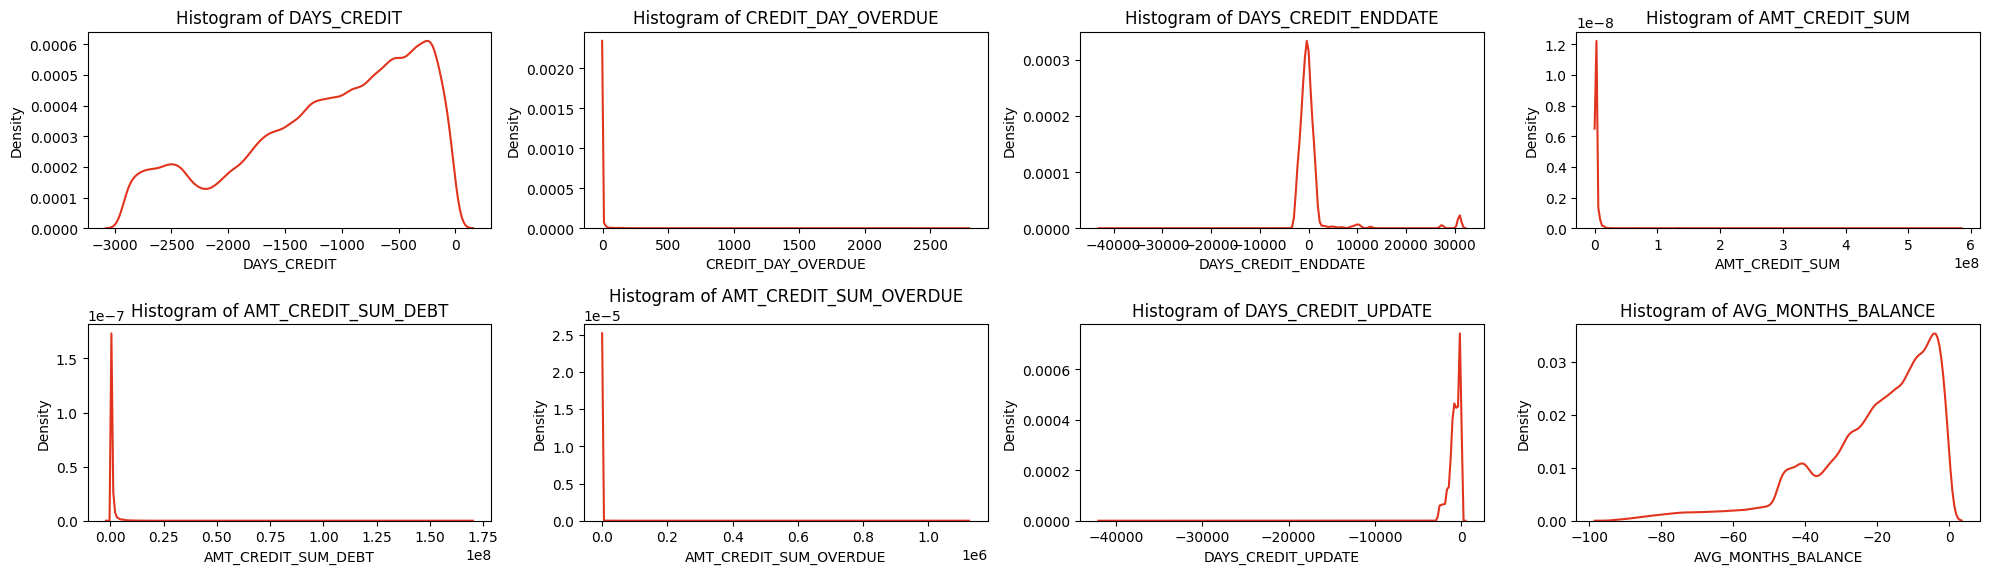

In [12]:
fig, ax = plt.subplots(2, 4, figsize=(20, 6))
ax = ax.flatten()
for i, col in enumerate(numbur.columns):
    sns.kdeplot(numbur[col], ax=ax[i], color='#E1341E')
    ax[i].set_title(f'Histogram of {col}')

plt.tight_layout()

In [17]:
bureaucl.sample(10)

SK_ID_CURR  SK_ID_BUREAU CREDIT_ACTIVE CREDIT_CURRENCY  DAYS_CREDIT  \
277505       379123       6010710        Active      currency 1         -175   
321373       235511       5532215        Closed      currency 1        -2270   
1484854      202191       6112343        Active      currency 1         -330   
906974       269594       5670125        Active      currency 1         -560   
1132801      172775       5517570        Active      currency 1         -491   
58193        239159       5236339        Closed      currency 1        -1734   
1403822      326935       5116341        Closed      currency 1        -1169   
981281       201233       6213254        Closed      currency 1        -1925   
832306       378317       6359985        Active      currency 1         -350   
51219        387037       5223523        Active      currency 1         -275   

         CREDIT_DAY_OVERDUE  DAYS_CREDIT_ENDDATE  CNT_CREDIT_PROLONG  \
277505                    0                554.0                   0   
321373                    0              -1906.0                   0   
1484854                   0               1496.0                   0   
906974                    0                536.0                   0   
1132801                   0               1335.0                   0   
58193                     0               -638.0                   0   
1403822                   0               -803.0                   0   
981281                    0              -1742.0                   0   
832306                    0                  NaN                   0   
51219                     0               1577.0                   0   

         AMT_CREDIT_SUM  AMT_CREDIT_SUM_DEBT  AMT_CREDIT_SUM_OVERDUE  \
277505        225000.00             179950.5                     0.0   
321373         38281.50                  0.0                     0.0   
1484854       756000.00             619564.5                     0.0   
906974       1125000.00             685687.5                     0.0   
1132801       472500.00                  NaN                     0.0   
58193         909000.00                  NaN                     0.0   
1403822        69508.71                  0.0                     0.0   
981281         38205.00                  NaN                     0.0   
832306         90000.00              30064.5                     0.0   
51219         166500.00                  0.0                     0.0   

             CREDIT_TYPE  DAYS_CREDIT_UPDATE  
277505   Consumer credit                 -10  
321373   Consumer credit               -1903  
1484854  Consumer credit                 -19  
906974   Consumer credit                 -11  
1132801  Consumer credit                 -13  
58193           Car loan                -834  
1403822  Consumer credit                -729  
981281   Consumer credit               -1006  
832306       Credit card                 -11  
51219        Credit card                 -11

In [24]:
print(f'Median values of AMT_CREDIT_SUM_DEBT: {bureaucl.AMT_CREDIT_SUM_DEBT.median()}')

Median values of AMT_CREDIT_SUM_DEBT: 0.0


- for `DAYS_CREDIT_ENDDATE` missing values will be filled with 0<br>
- for `AMT_CREDIT_SUB_DEBT` missing values will be filled with median values wich is 0

In [20]:
bureau_clean = bureaucl.fillna(0)
bureau_clean.to_csv('.././data/bureau_clean.csv', index=False)